In [1]:
import wave
import matplotlib.pyplot as plt
import os,pickle
import numpy as np
import scipy.io.wavfile
import csv
import pandas as pd
from scipy.io import wavfile
import contextlib
from pandas import Series,DataFrame
import struct
from pydub import AudioSegment
import scipy.signal as signal

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

ModuleNotFoundError: No module named 'pydub'

In [11]:
wave_file_dir = "./data/"
filelist = os.listdir(wave_file_dir)
#print(filelist)

In [12]:
print(len(filelist))

232


In [13]:
for name in filelist:
    if '.WAV' in name:
        filename = str(name[:-4])
        speakerID = str(filename[0:1])
        emotion = str(filename[1:-3])
        language = str(filename[-3:-2])
        grade = str(filename[-2:])
        with open('wave1.csv',mode='a',encoding ='utf-8') as f:
            f.write(filename+','+speakerID+','+emotion+','+language+','+grade+'\n')

In [14]:
wave1=pd.read_csv('wave1.csv',header=0, names = ['filename','speakerID','emotion','language','grade'])
wave1.head(231)

,filename,speakerID,emotion,language,grade
0,LsurpriseE03,L,surprise,E,3
1,LsurpriseC05,L,surprise,C,5
2,AangerC05,A,anger,C,5
3,PfearJ04,P,fear,J,4
4,LangerJ04,L,anger,J,4
...,...,...,...,...,...
225,FangerC05,F,anger,C,5
226,KdisgustE01,K,disgust,E,1
227,PsurpriseC05,P,surprise,C,5
228,DfearC05,D,fear,C,5


In [15]:
def get_seconds(filename):
    fname = wave_file_dir + filename +'.WAV'
    sound = AudioSegment.from_wav(fname)
    seconds = sound.duration_seconds
    seconds = float('%.3f' % seconds)
    seconds = seconds*1000 #换算成毫秒
    return seconds

In [16]:
wave1['seconds']=wave1.filename.apply(lambda x:get_seconds(x))

In [17]:
wave1.count()

filename     230
speakerID    230
emotion      230
language     230
grade        230
seconds      230
dtype: int64

In [18]:
wave1.head()

,filename,speakerID,emotion,language,grade,seconds
0,LsurpriseE03,L,surprise,E,3,27434.0
1,LsurpriseC05,L,surprise,C,5,14963.0
2,AangerC05,A,anger,C,5,1585.0
3,PfearJ04,P,fear,J,4,5915.0
4,LangerJ04,L,anger,J,4,25413.0


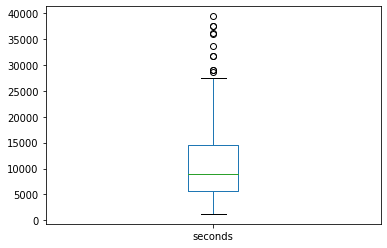

In [19]:
wave1.seconds.plot(kind="box")

In [20]:
expection=wave1[wave1.seconds>40000]# 补为40000ms
expection.head()

,filename,speakerID,emotion,language,grade,seconds


In [22]:
framerate = 44100
time = 4000000/44100
t = np.arange(0,time, 1.0/framerate)
wave_data = signal.chirp(t,100,time,1000,method='linear')*10000
wave_data = wave_data.astype(np.short)
for wavname in filelist:
    if ".WAV" in wavname:
        filelist = os.listdir(wave_file_dir)
        sine=wavname
        wav_path = wave_file_dir + wavname
        with wave.open(wav_path,mode="rb") as wav_data:
            nframes = wav_data.getparams()[3]
            str_data = wav_data.readframes(nframes)
            array_data = np.fromstring(str_data, dtype=np.short)
            a = array_data.shape[0]
            fix_data = np.pad(array_data, (0, 4000000-a), "edge")  

            f = wave.open(sine,"wb")
            f.setnchannels(2)
            f.setsampwidth(2)
            f.setframerate(framerate)

            f.writeframes(fix_data.tostring())
            f.close()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
